In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy import ndimage
from PIL import Image
from scipy import ndimage
from load_data import load_dataset
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
sigmoid(0)

0.5

In [4]:
def sigmoid_derivative(x):
    s = 1 / (1 + 1 / np.exp(x))
    return s * (1 - s)

In [5]:
x = np.array([1, 2, 3])


In [8]:
print("sigmoid_derivative(x) = "+str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


In [12]:
def image2vector(image):
    return image.reshape(image.shape[0] * image.shape[1] * image.shape[2], 1)

In [13]:
image = np.array([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[9, 8, 7],
                   [6, 5, 4],
                   [3, 2, 1]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])

In [14]:
print("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]
 [9]
 [8]
 [7]
 [6]
 [5]
 [4]
 [3]
 [2]
 [1]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [17]:
def normalizeRows(x):
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)  #保持矩阵的二维特性
    x = x / x_norm
    return x

In [21]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    result = x_exp / x_sum
    return result

In [22]:
x = np.array([[9, 2, 5, 0, 0],
              [7, 5, 0, 0, 0]])

In [23]:
print("softmax(x) = "+ str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [24]:
x1 = [1, 2, 3]
x2 = [1, 2, 3]
x3 = [[1, 2, 3]]
x4 = [[1], [2], [3]]

In [25]:
np.dot(x1, x2)

14

In [27]:
np.dot(x1, x4)

array([14])

In [28]:
np.dot(x3, x4)

array([[14]])

In [29]:
np.dot(x4, x3)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [30]:
np.ones((5,))

array([1., 1., 1., 1., 1.])

In [31]:
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [32]:
np.multiply(x1, x2)

array([1, 4, 9])

In [33]:
def L1(y, yhat):
    loss = np.sum(np.abs(y - yhat))
    return loss

In [34]:
yhat = np.array([.9, .2, .1, .4, .9])
y = np.array([1, 0, 0, 1, 1])

In [35]:
print("L1 = " + str(L1(yhat, y)))

L1 = 1.1


In [38]:
def L2(y, yhat):
    square_sum = np.dot(y-yhat, y-yhat)
    return square_sum

In [39]:
L2(y, yhat)

0.43

## Part2 - Logistic Regression with a Neural Network mindset

In [8]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()

y=[1], it's a 'cat' picture.


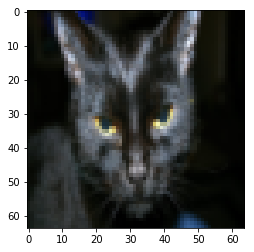

In [12]:
index = 25
plt.imshow(train_set_x[index])
print('y=' + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [14]:
train_set_x[index]

array([[[15, 15,  5],
        [17, 17,  6],
        [17, 17,  7],
        ...,
        [ 1,  1,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[16, 16,  5],
        [18, 17,  6],
        [19, 18,  9],
        ...,
        [ 1,  1,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[16, 16,  6],
        [18, 17,  8],
        [21, 19,  9],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  0],
        [ 2,  2,  1]],

       ...,

       [[16, 21, 18],
        [22, 27, 24],
        [29, 35, 33],
        ...,
        [ 0,  1,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[16, 20, 16],
        [22, 29, 25],
        [29, 35, 32],
        ...,
        [ 1,  3,  1],
        [ 0,  1,  0],
        [ 0,  0,  0]],

       [[14, 19, 14],
        [21, 29, 25],
        [31, 37, 33],
        ...,
        [ 2,  4,  2],
        [ 1,  2,  1],
        [ 0,  0,  0]]], dtype=uint8)

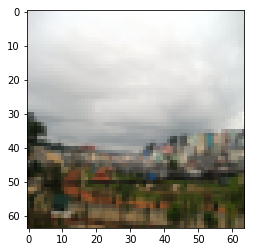

In [19]:
plt.imshow(train_set_x[17])

In [36]:
m_train = train_set_x.shape[0]

In [38]:
m_test = test_set_x.shape[0]

In [39]:
num_px = train_set_x.shape[1]

In [42]:
train_set_x.shape[1:]

(64, 64, 3)

In [56]:
train_set_x.reshape((m_train, -1)).T

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]], dtype=uint8)

In [59]:
train_set_x_flatten = train_set_x.reshape((m_train, -1)).T

In [60]:
test_set_x_flatten = test_set_x.reshape((m_test, -1)).T

In [61]:
train_set_x_flatten.shape

(12288, 209)

In [64]:
train_set_y.shape

(1, 209)

In [66]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [333]:
def cost_function(X, y, w, b):
    m = X.shape[1]
    a = y_hat(X, w, b)
    l = -(y * np.log(a) + (1 - y) * np.log(1 - a))
    return np.sum(l) / m

def y_hat(X, w, b):
    z = np.dot(w.T, X) + b
    y_hat = sigmoid(z)
    return y_hat
    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient(X, y, w, b):
    m = X.shape[1]
    a = y_hat(X, w, b)
    dw = np.dot(X, (a-y).T) / m
    db = np.sum(a - y) / m
    return dw, db

def batch_gradient_descent(X, y, w, b, alpha, epochs):
    cost_data = [cost_function(X, y, w, b)]
    _w = w.copy()
    _b = b
    for _ in range(epochs):
        dw, db = gradient(X, y, _w, _b)
        _w = _w - alpha * dw
        _b = _b - alpha * db
        cost_data.append(cost_function(X, y, _w, _b))
    return _w, _b, cost_data
    

In [334]:
X = np.array([[1., 2., -1.],
              [3., 4., -3.2]])
y = np.array([[1, 0, 1]])
w = np.array([[1.], [2.]])
b = 2.

In [336]:
final_w, final_b, costs = batch_gradient_descent(X, y, w, b, 0.009, 100)

In [330]:
final_w

array([[0.19033591],
       [0.12259159]])

In [332]:
db

0.21919450454067657

In [360]:
def predict(X, w, b):
    m = X.shape[1]
    _y = y_hat(X, w, b)
    a = pd.DataFrame(_y)
    a[a > 0.5] = 1
    a[a <= 0.5] = 0
    return a.as_matrix()

In [361]:
def logistic_model(X_train, y_train, X_test, y_test, alpha, epochs):
    w = np.zeros((X_train.shape[0], 1))
    b = 0
    w, b, costs = batch_gradient_descent(X_train, y_train, w, b, alpha, epochs)
    a_train = predict(X_train, w, b)
    a_test = predict(X_test, w, b)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(np.squeeze(a_train - y_train)))*100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(np.squeeze(a_test - y_test))) * 100))
    return 

In [362]:
logistic_model(train_set_x, train_set_y, test_set_x, test_set_y, 0.005, 2000)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


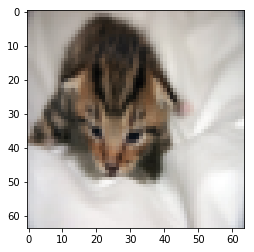

In [364]:
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))

/home/lee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/lee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


y = 0.0, your algorithm predicts a "non-cat" picture.


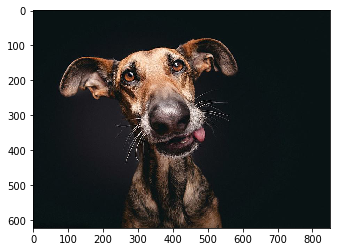

In [373]:
my_image = "dog4.jpeg"
image = np.array(ndimage.imread(my_image, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(my_image, final_w, final_b)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")